 # Jigyasa Gandhi - jigsgandhi97@gmail.com - 60004160027

### Importing data

In [1]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# plot stylings
plt.style.use('fivethirtyeight')
%matplotlib inline

# do not display warnings in notebook 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read dataset
dataset = pd.read_csv('../predict-voting-outcomes/train.csv')
validation=pd.read_csv('../predict-voting-outcomes/train.csv')
# X = dataset.iloc[:, :-1].values
# y = dataset.iloc[:, 1].values
labels=list(dataset.columns[1:].values)

In [3]:
# display the first rows in the dataset
dataset.head()

,Unnamed: 0,USER_ID,YOB,Gender,Income,HouseholdStatus,EducationLevel,Q124742,Q124122,Q123464,...,Q99716,Q99581,Q99480,Q98869,Q98578,Q98059,Q98078,Q98197,Q96024,Party
0,1044,1295,1971.0,Female,"$100,001 - $150,000",Married (w/kids),Bachelor's Degree,NaN,Yes,No,...,No,No,Yes,No,No,Yes,No,No,Yes,Democrat
1,2671,3324,1981.0,Female,"$25,001 - $50,000",Married (w/kids),Associate's Degree,NaN,NaN,NaN,...,No,No,Yes,NaN,No,Yes,NaN,Yes,No,Republican
2,5549,6939,1999.0,Female,NaN,Single (no kids),Current K-12,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Democrat
3,1231,1525,1997.0,Male,"$75,000 - $100,000",Single (no kids),Current K-12,NaN,NaN,NaN,...,No,Yes,No,No,No,Only-child,No,No,Yes,Democrat
4,2685,3341,1977.0,Male,"over $150,000",Married (w/kids),Doctoral Degree,No,No,No,...,No,No,Yes,Yes,No,Yes,Yes,No,Yes,Democrat


In [4]:
# get the shape of the datasetframe
dataset.shape
validation.shape

(4732, 109)

In [5]:
dataset=pd.DataFrame(dataset.iloc[:,1:].values,columns=labels)
validation=pd.DataFrame(validation.iloc[:,1:].values,columns=labels)


In [6]:
dataset.head()
validation.head()

,USER_ID,YOB,Gender,Income,HouseholdStatus,EducationLevel,Q124742,Q124122,Q123464,Q123621,...,Q99716,Q99581,Q99480,Q98869,Q98578,Q98059,Q98078,Q98197,Q96024,Party
0,1295,1971,Female,"$100,001 - $150,000",Married (w/kids),Bachelor's Degree,NaN,Yes,No,No,...,No,No,Yes,No,No,Yes,No,No,Yes,Democrat
1,3324,1981,Female,"$25,001 - $50,000",Married (w/kids),Associate's Degree,NaN,NaN,NaN,NaN,...,No,No,Yes,NaN,No,Yes,NaN,Yes,No,Republican
2,6939,1999,Female,NaN,Single (no kids),Current K-12,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Democrat
3,1525,1997,Male,"$75,000 - $100,000",Single (no kids),Current K-12,NaN,NaN,NaN,NaN,...,No,Yes,No,No,No,Only-child,No,No,Yes,Democrat
4,3341,1977,Male,"over $150,000",Married (w/kids),Doctoral Degree,No,No,No,Yes,...,No,No,Yes,Yes,No,Yes,Yes,No,Yes,Democrat


### Checking for null values

In [7]:
# check for null values
dataset.isnull().sum()

USER_ID               0
YOB                 281
Gender               98
Income              885
HouseholdStatus     389
EducationLevel      735
Q124742            2929
Q124122            2092
Q123464            1963
Q123621            2027
Q122769            1888
Q122770            1770
Q122771            1759
Q122120            1741
Q121699            1567
Q121700            1596
Q120978            1577
Q121011            1545
Q120379            1600
Q120650            1540
Q120472            1636
Q120194            1757
Q120012            1588
Q120014            1726
Q119334            1684
Q119851            1521
Q119650            1635
Q118892            1508
Q118117            1583
Q118232            2039
                   ... 
Q106388            1910
Q106389            1959
Q106042            1884
Q105840            1961
Q105655            1773
Q104996            1798
Q103293            1802
Q102906            1904
Q102674            1954
Q102687            1844
Q102289         

Now, the questions answered decides the behaviour of the person which in turn decides if he is democratic or republic. So the null rows do not contribute much to the final results. Hence we remove them.

In [8]:
dataset=dataset.dropna(axis=0)
validation=validation.dropna(axis=0)

In [9]:
# check for null values
dataset.isnull().sum()
validation.isnull().sum()

USER_ID            0
YOB                0
Gender             0
Income             0
HouseholdStatus    0
EducationLevel     0
Q124742            0
Q124122            0
Q123464            0
Q123621            0
Q122769            0
Q122770            0
Q122771            0
Q122120            0
Q121699            0
Q121700            0
Q120978            0
Q121011            0
Q120379            0
Q120650            0
Q120472            0
Q120194            0
Q120012            0
Q120014            0
Q119334            0
Q119851            0
Q119650            0
Q118892            0
Q118117            0
Q118232            0
                  ..
Q106388            0
Q106389            0
Q106042            0
Q105840            0
Q105655            0
Q104996            0
Q103293            0
Q102906            0
Q102674            0
Q102687            0
Q102289            0
Q102089            0
Q101162            0
Q101163            0
Q101596            0
Q100689            0
Q100680      

Null values have been eliminated

## Preprocessing 

In [10]:
print(dataset['Income'].unique())

['over $150,000' 'under $25,000' '$100,001 - $150,000'
 '$75,000 - $100,000' '$50,000 - $74,999' '$25,001 - $50,000']


In [11]:
inc={'$100,001 - $150,000':4, '$25,001 - $50,000':1,'$75,000 - $100,000':3,
 'over $150,000':5, 'under $25,000':0, '$50,000 - $74,999':2}

In [12]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

In [13]:
dataset['Inc'] = [inc[item] for item in dataset.Income] 
validation['Inc'] = [inc[item] for item in dataset.Income] 

In [14]:
dataset.head()

,USER_ID,YOB,Gender,Income,HouseholdStatus,EducationLevel,Q124742,Q124122,Q123464,Q123621,...,Q99581,Q99480,Q98869,Q98578,Q98059,Q98078,Q98197,Q96024,Party,Inc
4,3341,1977,Male,"over $150,000",Married (w/kids),Doctoral Degree,No,No,No,Yes,...,No,Yes,Yes,No,Yes,Yes,No,Yes,Democrat,5
31,3224,1992,Male,"under $25,000",Single (no kids),Current Undergraduate,No,No,No,No,...,No,Yes,Yes,No,Yes,No,No,Yes,Democrat,0
47,3584,1980,Male,"$100,001 - $150,000",Married (w/kids),Current Undergraduate,No,Yes,No,Yes,...,No,Yes,Yes,No,Yes,No,Yes,Yes,Republican,4
59,5077,1985,Male,"$75,000 - $100,000",Single (w/kids),Associate's Degree,Yes,Yes,No,Yes,...,No,Yes,No,No,Yes,No,No,Yes,Republican,3
63,520,1972,Female,"under $25,000",Single (no kids),Bachelor's Degree,No,No,No,No,...,No,Yes,Yes,Yes,Yes,No,Yes,Yes,Republican,0


In [15]:
dataset.shape
validation.shape

(593, 109)

## EDA


### Not very unbalanced data

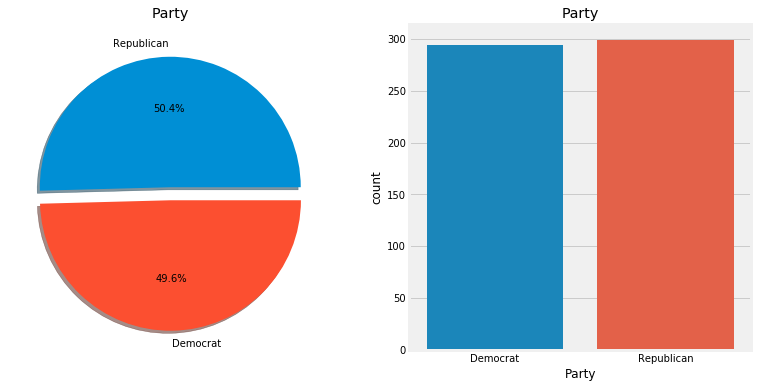

In [16]:
f,ax=plt.subplots(1,2,figsize=(12,6))
dataset['Party'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Party')
ax[0].set_ylabel('')
sns.countplot('Party',data=dataset,ax=ax[1])
ax[1].set_title('Party')
plt.show()

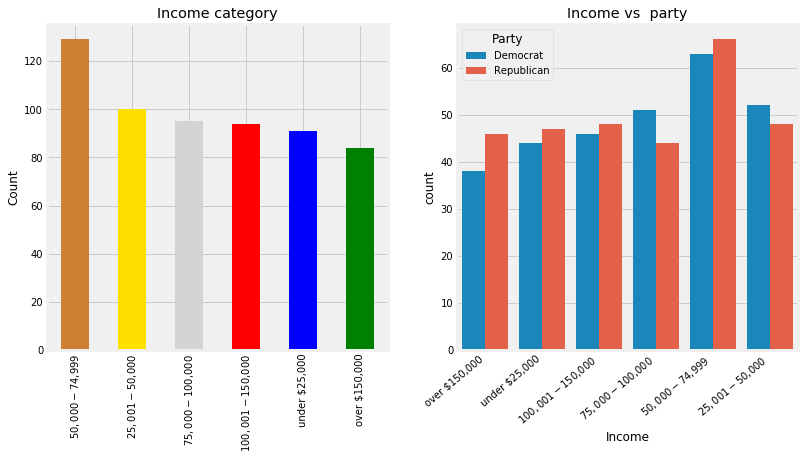

In [17]:
f,ax=plt.subplots(1,2,figsize=(12,6))
dataset['Income'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3','red', 'blue', 'green'],ax=ax[0])
ax[0].set_title('Income category')
ax[0].set_ylabel('Count')
sns.countplot('Income',hue='Party',data=dataset,ax=ax[1])
ax[1].set_title('Income vs  party')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=40, ha="right")
plt.show()

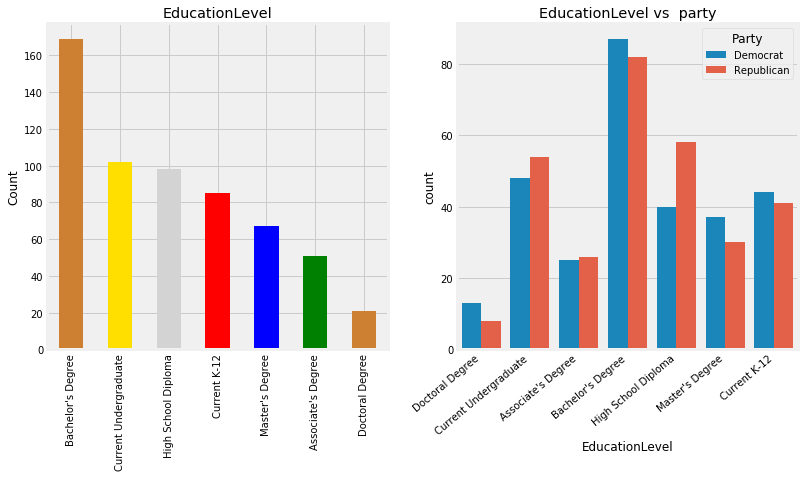

In [18]:
f,ax=plt.subplots(1,2,figsize=(12,6))
dataset['EducationLevel'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3','red', 'blue', 'green'],ax=ax[0])
ax[0].set_title('EducationLevel')
ax[0].set_ylabel('Count')
sns.countplot('EducationLevel',hue='Party',data=dataset,ax=ax[1])
ax[1].set_title('EducationLevel vs  party')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=40, ha="right")
plt.show()

## Encoding the answers

In [19]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
columns = list(dataset)

for i in range(len(columns)):
    if i >= 6 and i < 107:
        

        dataset[columns[i]] = dataset[columns[i]].fillna(0)
        validation[columns[i]] = validation[columns[i]].fillna(0)
        list1 = list(dataset[columns[i]].unique())
        if 0 in list1:
            list1.remove(0)
        a,b = list1
        dataset[columns[i]] = dataset[columns[i]].map( {a: 0, b: 1, 0: 2} ).astype(int)
        validation[columns[i]] = validation[columns[i]].map( {a: 0, b: 1, 0: 2} ).astype(int)
        

    
lb_make = LabelEncoder()
lb_make.fit(dataset['EducationLevel'].unique())
dataset['EducationLevel'] = lb_make.transform(dataset['EducationLevel'])
validation['EducationLevel']= lb_make.transform(validation['EducationLevel'])

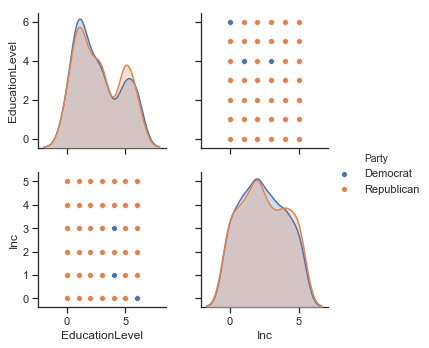

In [20]:
import seaborn as sns; 
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(dataset,hue="Party",vars=["EducationLevel", "Inc"])

## Income and Education are highly correlated

In [21]:
dataset=dataset.drop(columns=['Income'])
validation=validation.drop(columns=['Income'])


In [22]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()

lb_make.fit(dataset['Party'].unique())
dataset['Party'] = lb_make.transform(dataset['Party'])
validation['Party']= lb_make.transform(validation['Party'])

lb_make = LabelEncoder()
lb_make.fit(['Male','Female'])
dataset['Gender'] = lb_make.transform(dataset['Gender'])
validation['Gender']= lb_make.transform(validation['Gender'])
lb_make = LabelEncoder()
lb_make.fit(dataset['HouseholdStatus'].unique())
dataset['HouseholdStatus'] = lb_make.transform(dataset['HouseholdStatus'])
validation['HouseholdStatus']= lb_make.transform(validation['HouseholdStatus'])



In [23]:
dataset.head()

,USER_ID,YOB,Gender,HouseholdStatus,EducationLevel,Q124742,Q124122,Q123464,Q123621,Q122769,...,Q99581,Q99480,Q98869,Q98578,Q98059,Q98078,Q98197,Q96024,Party,Inc
4,3341,1977,1,3,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
31,3224,1992,1,4,3,0,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0
47,3584,1980,1,3,3,0,1,0,0,0,...,0,0,0,0,0,1,1,0,1,4
59,5077,1985,1,5,0,1,1,0,0,0,...,0,0,1,0,0,1,0,0,1,3
63,520,1972,0,4,1,0,0,0,1,1,...,0,0,0,1,0,1,1,0,1,0


Democrat = 0
Republican = 1

In [24]:
y_train=dataset['Party']
y_val=dataset['Party']
dataset=dataset.drop(columns=['Party','YOB'])
validation=validation.drop(columns=['Party','YOB'])
x_train=dataset
x_val=validation

We can now make modelels on balanced data

### Logistic regression

In [25]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=True)
clf.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [26]:
y_pred=clf.predict(x_val)

In [27]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score, accuracy_score

In [28]:
f1=f1_score(y_val, y_pred)
acc=accuracy_score(y_val, y_pred)
tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
t=tp+tn+fn+fp
pr=precision_score(y_val, y_pred)
print(tn/t, fp/t, fn/t, tp/t)
print("specificity: "+str(tn/(tn+fp)))
print("sensitivity: "+str(tp/(tp+fn)))
print("accuracy_score:",acc)
print("precision_score:",pr)
print("f1_score:",f1)

0.33558178752107926 0.16020236087689713 0.1163575042158516 0.38785834738617203
specificity: 0.6768707482993197
sensitivity: 0.7692307692307693
accuracy_score: 0.7234401349072512
precision_score: 0.7076923076923077
f1_score: 0.7371794871794873


## Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, recall_score, precision_score

In [30]:
# Declare key parameters of classifier as Iterables

n_estimators = np.arange(3,25,2)
max_depth = np.arange(1,5,1)
criterion = ['gini', 'entropy']
min_samples_split = np.arange(2,6,1)
min_samples_leaf = np.arange(2,6,1)
random_state = [1337]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth, 
               'criterion': criterion,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'random_state': random_state}

print(random_grid)

{'n_estimators': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23]), 'max_depth': array([1, 2, 3, 4]), 'criterion': ['gini', 'entropy'], 'min_samples_split': array([2, 3, 4, 5]), 'min_samples_leaf': array([2, 3, 4, 5]), 'random_state': [1337]}


In [31]:
# Create Base Model for tuning
rf = RandomForestClassifier()

# Instantiate Random Search of Parameters using 3 fold cross validation
rf_random = RandomizedSearchCV(estimator=rf,
                               param_distributions=random_grid, 
                               n_iter=10, 
                               cv=4, 
                               random_state=137)

In [32]:
# Execute training (Fit the random search model)

rf_random.fit(x_train, y_train) 
print('Done')

Done


C:\Users\JigDhwani\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [33]:
rf_random.best_params_

{'random_state': 1337,
 'n_estimators': 15,
 'min_samples_split': 3,
 'min_samples_leaf': 3,
 'max_depth': 4,
 'criterion': 'gini'}

In [34]:
best_rf = rf_random.best_estimator_

In [35]:
predictions = list(best_rf.predict(x_val))

print('Accuracy:', best_rf.score(x_val, y_val))
print('Precision:', precision_score(list(y_val), predictions))
print('Recall:', recall_score(list(y_val), predictions))

Accuracy: 0.7672849915682968
Precision: 0.7402985074626866
Recall: 0.8294314381270903


## Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [37]:
y_pred = classifier.predict(x_val)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, y_pred)
print(cm)

[[294   0]
 [  0 299]]


In [38]:
f1=f1_score(y_val, y_pred)
acc=accuracy_score(y_val, y_pred)
tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
t=tp+tn+fn+fp
pr=precision_score(y_val, y_pred)
print(tn/t, fp/t, fn/t, tp/t)
print("specificity: "+str(tn/(tn+fp)))
print("sensitivity: "+str(tp/(tp+fn)))
print("accuracy_score:",acc)
print("precision_score:",pr)
print("f1_score:",f1)

0.4957841483979764 0.0 0.0 0.5042158516020236
specificity: 1.0
sensitivity: 1.0
accuracy_score: 1.0
precision_score: 1.0
f1_score: 1.0


## SVC

In [39]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(x_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(x_val)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, y_pred)
f1=f1_score(y_val, y_pred)
acc=accuracy_score(y_val, y_pred)
tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
t=tp+tn+fn+fp
pr=precision_score(y_val, y_pred)
print(tn/t, fp/t, fn/t, tp/t)
print("specificity: "+str(tn/(tn+fp)))
print("sensitivity: "+str(tp/(tp+fn)))
print("accuracy_score:",acc)
print("precision_score:",pr)
print("f1_score:",f1)

0.45193929173693087 0.04384485666104553 0.01854974704890388 0.4856661045531197
specificity: 0.9115646258503401
sensitivity: 0.9632107023411371
accuracy_score: 0.9376053962900506
precision_score: 0.9171974522292994
f1_score: 0.9396411092985318


# Conclusions

| MEtrics   |      Logistic      |  RandomF | Decision Tree | SVC |
|----------|:-------------:|------:|---:|---:|
|Accuracy | 0.7234401349072512| 0.7672849915682968 | 1.0 | 0.9376053962900506 |
| Precision |  0.7076923076923077   |   0.7402985074626866 | 1.0 |  0.9171974522292994 |
| Recall | 0.7692307692307693 |0.8294314381270903| 1.0 | 0.9632107023411371 |


Here we see that Decision tree overfits
The F1 score of random forest will be better than other models used (Compared to Logistic regression and decision tree that overfits )
Hence we say that random forest performs better.
SVC - Support vector Classifier uses rbf kernal that helps make data linear. Its performs the best from all the other models (evident from its precision and recall, their weighted average will be better)